In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data= pd.read_csv("drive/My Drive/FYP/Data/ads_fact_500000_transformed.csv", engine='python', encoding='utf-8', error_bad_lines=False)
data = data.drop(['badge'],axis=1)
data = data.drop(['coordinates'],axis=1)
data = data.drop(['date_time'],axis=1)
#removing NaNs
data[['badge_transformed']] = data[['badge_transformed']].fillna("")
print (data)

           ad_id  make_id  ...  datetime_year  datetime_month
0       73919640       34  ...           2019               7
1       73919652        8  ...           2019               7
2       73919677        8  ...           2019               7
3       73919705       66  ...           2019               7
4       73919723       81  ...           2019               7
...          ...      ...  ...            ...             ...
499995  93031487       86  ...           2019              11
499996  93031488       53  ...           2019              11
499997  93031587       29  ...           2019              11
499998  93032161       93  ...           2019              11
499999  93032179       29  ...           2019              11

[500000 rows x 22 columns]


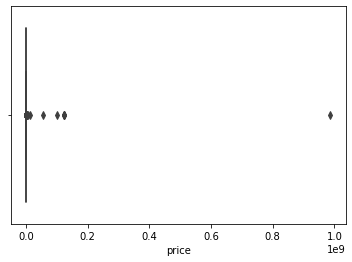

In [0]:
sns.boxplot(x=data['price'])

count    5.000000e+05
mean     2.734445e+04
std      1.447427e+06
min      0.000000e+00
25%      1.249600e+04
50%      1.988800e+04
75%      3.000000e+04
max      9.864846e+08
Name: price, dtype: float64



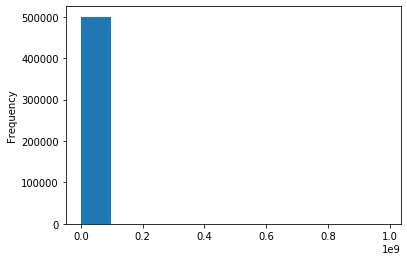

In [0]:
print(data.price.describe())
print()
data.price.plot(kind='hist')

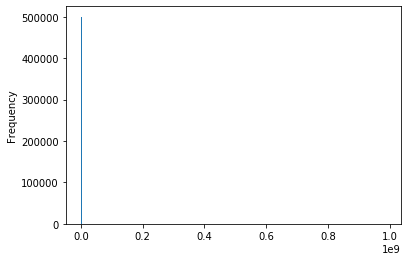

In [0]:
data.price.plot(kind='hist',bins=300)

In [0]:
def detect_outlier(data):
    
    outliers = []

    threshold=3
    mean = np.nanmean(data.price.values)
    std =np.nanstd(data.price.values)
    
    for index, row in data.iterrows():
        y = row['price']
        z_score = (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(index)
    return outliers

In [0]:
outliers = detect_outlier(data)
print(outliers)
print(len(outliers))
data = data.drop(outliers)

[204906, 257995, 264253, 311924, 315315, 376419, 407596, 436111, 488835]
9


count    4.999910e+05
mean     2.403547e+04
std      1.995154e+04
min      0.000000e+00
25%      1.249600e+04
50%      1.988800e+04
75%      3.000000e+04
max      1.234567e+06
Name: price, dtype: float64



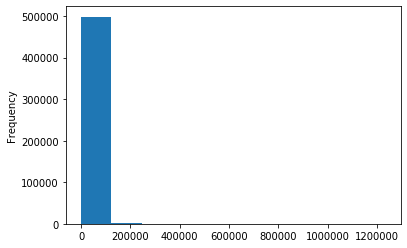

In [0]:
print(data.price.describe())
print()
data.price.plot(kind='hist')

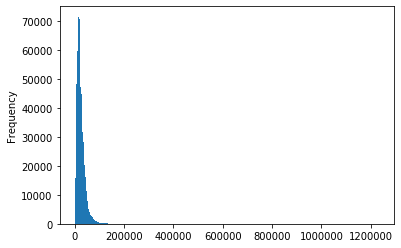

In [0]:
data.price.plot(kind='hist',bins=300)

In [0]:
# data['price_category'] = pd.qcut(data['price'], q=500000, duplicates='drop',labels=False)
# print(data.columns.values)

In [0]:
from sklearn import preprocessing

In [0]:
le_badge_transformed = preprocessing.LabelEncoder()
data.loc[:,"badge_transformed"] = le_badge_transformed.fit_transform(list(np.array(data.badge_transformed)))

le_coordinates2city = preprocessing.LabelEncoder()
data.loc[:,'coordinates2city'] = le_coordinates2city.fit_transform(list(np.array(data.coordinates2city)))

In [0]:
data=data.drop(['ad_id' ,'source_id', 'image' ,'url' ,'hash' ,'click_count'],axis=1)
data=data.drop(['title', 'duplicate', 'ad_status'],axis=1)

In [0]:
data=data.drop(['city'],axis=1)

In [0]:
data=data.drop(['state_id'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
y = data.price
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

print("\ny_train:\n")
print(y_train.head())
print(y_train.shape)

print("\ny_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

        make_id  model_id  ...  datetime_year  datetime_month
201739       99      1599  ...           2019               9
131667       98      2197  ...           2019               8
102812        8      1511  ...           2019               8
376618       81      1534  ...           2019              10
94101        29      1509  ...           2019               8

[5 rows x 10 columns]
(399992, 10)

X_test:

        make_id  model_id  ...  datetime_year  datetime_month
77539        25      1529  ...           2019               8
234170       66      1591  ...           2019               9
306928        8      1734  ...           2019              10
242773        5      1525  ...           2019               9
393828       25      1529  ...           2019              10

[5 rows x 10 columns]
(99999, 10)

y_train:

201739     45480
131667    102990
102812     17180
376618      7400
94101      69950
Name: price, dtype: int64
(399992,)

y_test:

77539     32999
234170

In [0]:
X.columns.values

array(['make_id', 'model_id', 'fuel_type_id', 'body_type_id', 'year',
       'km_driven', 'badge_transformed', 'coordinates2city',
       'datetime_year', 'datetime_month'], dtype=object)

In [0]:
# data=data.drop(['price'],axis=1)

In [0]:
# from sklearn.model_selection import train_test_split
# y = data.price_category
# X = data.drop('price_category', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# print("\nX_train:\n")
# print(X_train.head())
# print(X_train.shape)

# print("\nX_test:\n")
# print(X_test.head())
# print(X_test.shape)

# print("\ny_train:\n")
# print(y_train.head())
# print(y_train.shape)

# print("\ny_test:\n")
# print(y_test.head())
# print(y_test.shape)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

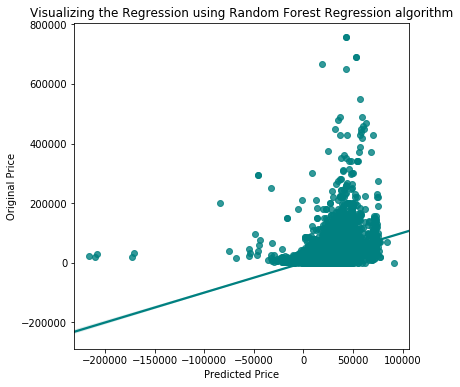

In [0]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(pred, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Original Price")
plt.show()

In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — —" )
print("Mean Squared Error is :", mean_squared_error(y_test, pred))
print("— — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of RandomForest Regressor is :", r2_score(y_test, pred)*100)
print("— — — — — — — — — — — — — — — — — — — — — — — ")

Mean Absolute Error is : 9661.392533968083
 — — — — — — — — — — — — — — — — — — — — — — —
Mean Squared Error is : 288019280.4806704
— — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of RandomForest Regressor is : 26.179811348136862
— — — — — — — — — — — — — — — — — — — — — — — 


In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores = cross_val_score(model, X, y, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.26303742 0.26126251 0.25935271 0.26315612 0.27413734 0.27091754
 0.23322115 0.21835973 0.2662295  0.19272093]


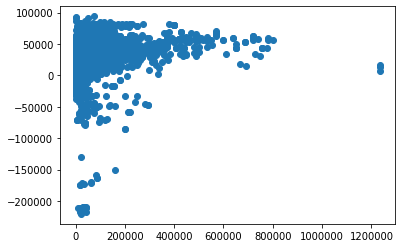

In [0]:
predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.2547032341737272


In [0]:
#Linear Regressor doesn't work well - experiment conclusion